In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [121]:
def bivariate_normal(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples):
    """ Generate n_samples pairs of bivariate normal random variables, with parameters
    mean = (mu_x, mu_y)
    std = (sigma_x, sigma_y)
    correlation = rho
    """
    # Covariance matrix
    cov_matrix = np.array([[sigma_x**2, rho * sigma_x * sigma_y],
                           [rho * sigma_x * sigma_y, sigma_y**2]])
    
    # Generate random samples using a bivariate normal with given means and covariances
    # reference https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
    samples = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, n_samples)
    
    return samples


def conditional_normal(x, mu_x, mu_y, sigma_x, sigma_y, rho, n_samples):
    """ Generate n_samples random variables following a conditional normal.
    In particular, the distribution is f_{Y|X}(y|x), that is the conditional distribution
    of Y given X = x. The distribution is normal with mean and std dev:
    E[Y|X=x] = mu_z = mu_y + (rho * sigma_y) * (x - mu_x) / sigma_x
    std(Y|X=x) =  sigma_z = sigma_y * np.sqrt(1 - rho**2)
    """
    # mean and std
    mu_z = mu_y + (rho * sigma_y) * (x - mu_x) / sigma_x
    sigma_z = sigma_y * np.sqrt(1 - rho**2)

    # generate normal random samples    
    samples_z = np.random.normal(mu_z, sigma_z, n_samples)
    
    return samples_z

def scatterplot_bivariate(samples, title):
    """ Scatterplot of the bivariate normal distribution
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

def hist3d_bivariate(samples, title):
    """ 3D histogram of the bivariate normal distribution
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d(samples[:, 0], samples[:, 1], bins=20)

    # Build the histogram coordinates
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Bins sizes
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='orange')

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('frequency')
    plt.show()

def hist3d_bivariate_projection(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples):
    """ 3D histogram of the normal projection, that is the conditional expectation of Y given X = x.
    In particular, in this plot we let x assume values between -3 and 3 and plot the resulting histograms.
    We will see how the projection distribution varies with x.
    """
    x_values = np.linspace(-3, 3, 20)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # give histograms different colors
    colors = cm.viridis(np.linspace(0, 1, len(x_values)))

    for i, x in enumerate(x_values):
        # Generate n_samples from the conditional distribution with given x
        samples_z = conditional_normal(x, mu_x, mu_y, sigma_x, sigma_y, rho, n_samples)
        
        # build the histogram
        hist, bins = np.histogram(samples_z, bins=10)
        ax.bar(bins[:-1], hist, zs=x, zdir='y', color=colors[i], alpha=0.7)

    # plot the histograms
    ax.set_title(f'Bivariate Normal Projection of Y given X = x\n\nrho = {rho}')
    ax.set_xlabel('Y')
    ax.set_ylabel('x')
    ax.set_zlabel('frequency')
    plt.show()



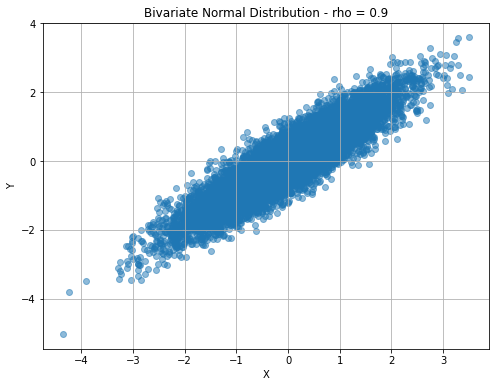

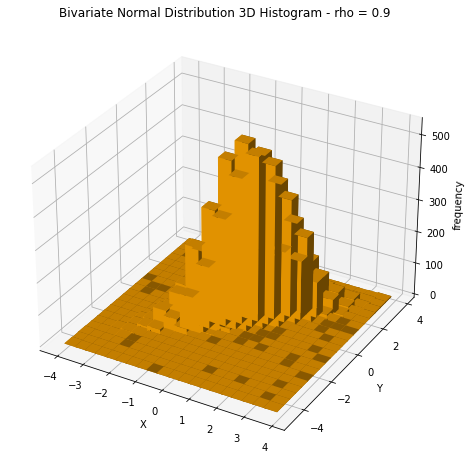

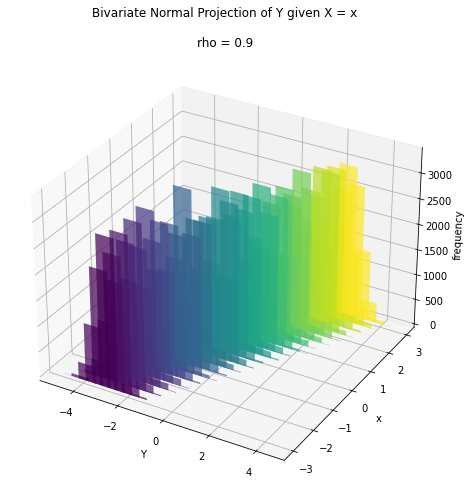

In [122]:
# Parameters of the simulation
mu_x = 0
mu_y = 0
sigma_x = 1
sigma_y = 1
rho = 0.9  # correlation coefficient
n_samples = 10000  # number of samples

samples = bivariate_normal(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples)

scatterplot_bivariate(samples, f'Bivariate Normal Distribution - rho = {rho}')
hist3d_bivariate(samples, f'Bivariate Normal Distribution 3D Histogram - rho = {rho}')
hist3d_bivariate_projection(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples)

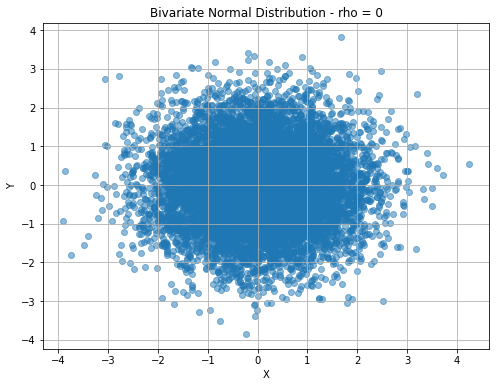

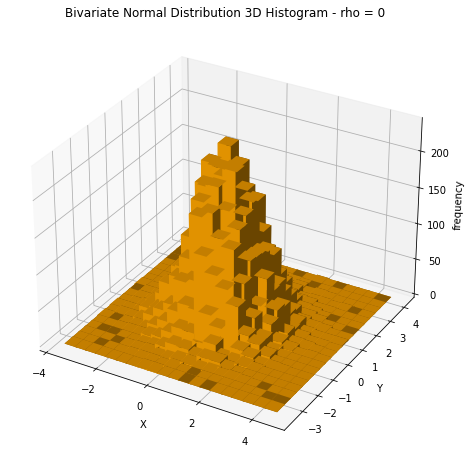

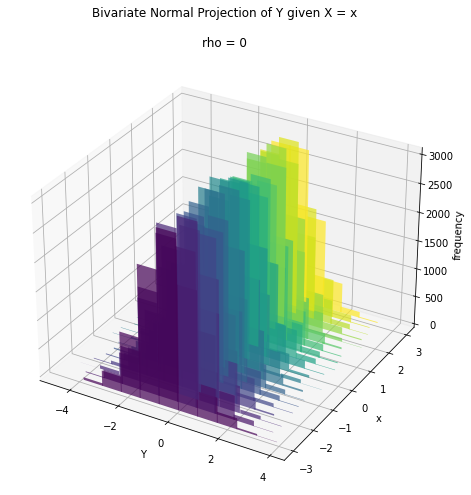

In [123]:
# Parameters of the simulation
mu_x = 0
mu_y = 0
sigma_x = 1
sigma_y = 1
rho = 0  # correlation coefficient
n_samples = 10000  # number of samples

samples = bivariate_normal(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples)

scatterplot_bivariate(samples, f'Bivariate Normal Distribution - rho = {rho}')
hist3d_bivariate(samples, f'Bivariate Normal Distribution 3D Histogram - rho = {rho}')
hist3d_bivariate_projection(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples)

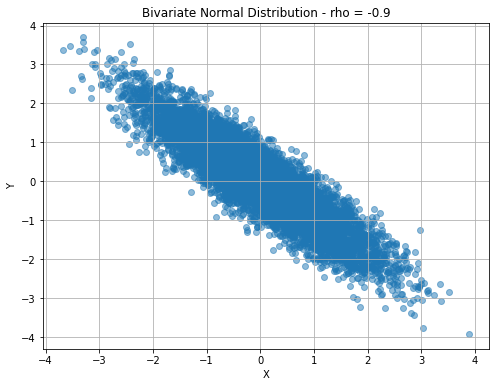

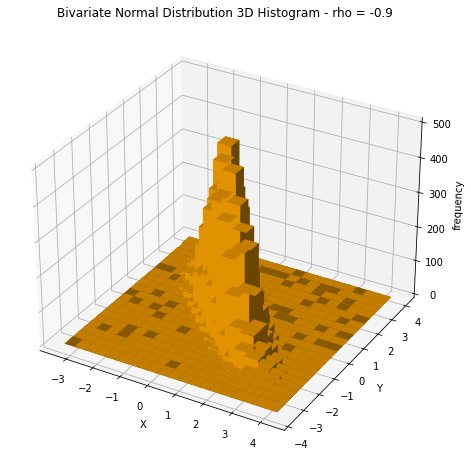

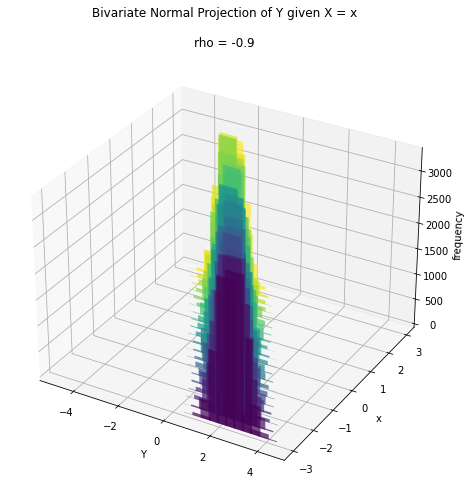

In [124]:
# Parameters of the simulation
mu_x = 0
mu_y = 0
sigma_x = 1
sigma_y = 1
rho = -0.9  # correlation coefficient
n_samples = 10000  # number of samples

samples = bivariate_normal(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples)

scatterplot_bivariate(samples, f'Bivariate Normal Distribution - rho = {rho}')
hist3d_bivariate(samples, f'Bivariate Normal Distribution 3D Histogram - rho = {rho}')
hist3d_bivariate_projection(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples)